In [30]:
%matplotlib inline
from matplotlib import rcParams

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Introduction to clustering

Clustering is a machine learning technique used to group unlabeled datapoints in groups called *clusters*. The grouping is done such that similar items are together in the same cluster and items in different clusters are dissimilar from each-other. Typically similarity is defined using a distance measure (Euclidean, cosine, etc). Common practical applications for clustering include: market segmentation, social network analysis, search result grouping, anomaly detection etc.


Two clustering methods will be explored in this notebook:

- K-means.
- Hierarchical clustering.

More methods can be found [here](https://scikit-learn.org/stable/modules/classes.html?highlight=cluster#module-sklearn.cluster).

#### To begin with
Get familiar with how clustering works by watching the videos in Resources A and reading the article in Resources B.


#### Resources: 

* A. Introduction to clustering:
    * https://www.youtube.com/watch?v=4cxVDUybHrI
    
    
* B. A Comprehensive Survey of Clustering Algorithms
    * https://link.springer.com/article/10.1007/s40745-015-0040-1 (Read everything until the section Traditional Clustering Algorithms. From the section Traditional Clustering Algorithms, read the first 2 subsections. You can skip Modern Traditional Clustering Algorithms.)



* C. K-means clustering:
     * https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
     
     * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)
     
     
* D. Hierarchical clustering:
    * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
    * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
    * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering 

### Subject comprehension 

To check your understanding, before moving further, answer the questions in your own words in the space below.

1. What is clustering?
2. What are the main steps in the standard process of clustering?
3. What is the Silhouette coefficient?
4. What are the two types of evaluation for a clustering algorithm and what is the difference between them?

*Answer here*

### Data acquisition

Load the data about bank clients from the *bank-full.csv* file into a pandas dataframe. Make the necessary imports.

In [32]:
# code here
df = pd.read_csv('../data/bank-full.csv', sep=';')

Print a summary of the data as well as the first 5 rows.

In [33]:
# code here
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Preprocessing

To facilitate the computation of distances, keep only the numerical features in the dataset.

- Remove all non-numerical features, as well as the features related to the date.
- Make sure there are no missing values - if they exist, remove them.
- Normalize the new dataset (transform the data for multiple features to the same scale).
- Save the result in a dataframe *df_norm*

In [35]:
# code here
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assume df is the original DataFrame
# 1. Remove non-numerical and date-related features
df_numeric = df.select_dtypes(include=['number'])

# 2. Handle missing values by removing rows with missing values
df_numeric_cleaned = df_numeric.dropna()

# 3. Normalize the dataset
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_numeric_cleaned), columns=df_numeric_cleaned.columns)

# df_norm is now the normalized DataFrame ready for clustering

Plot histograms of features

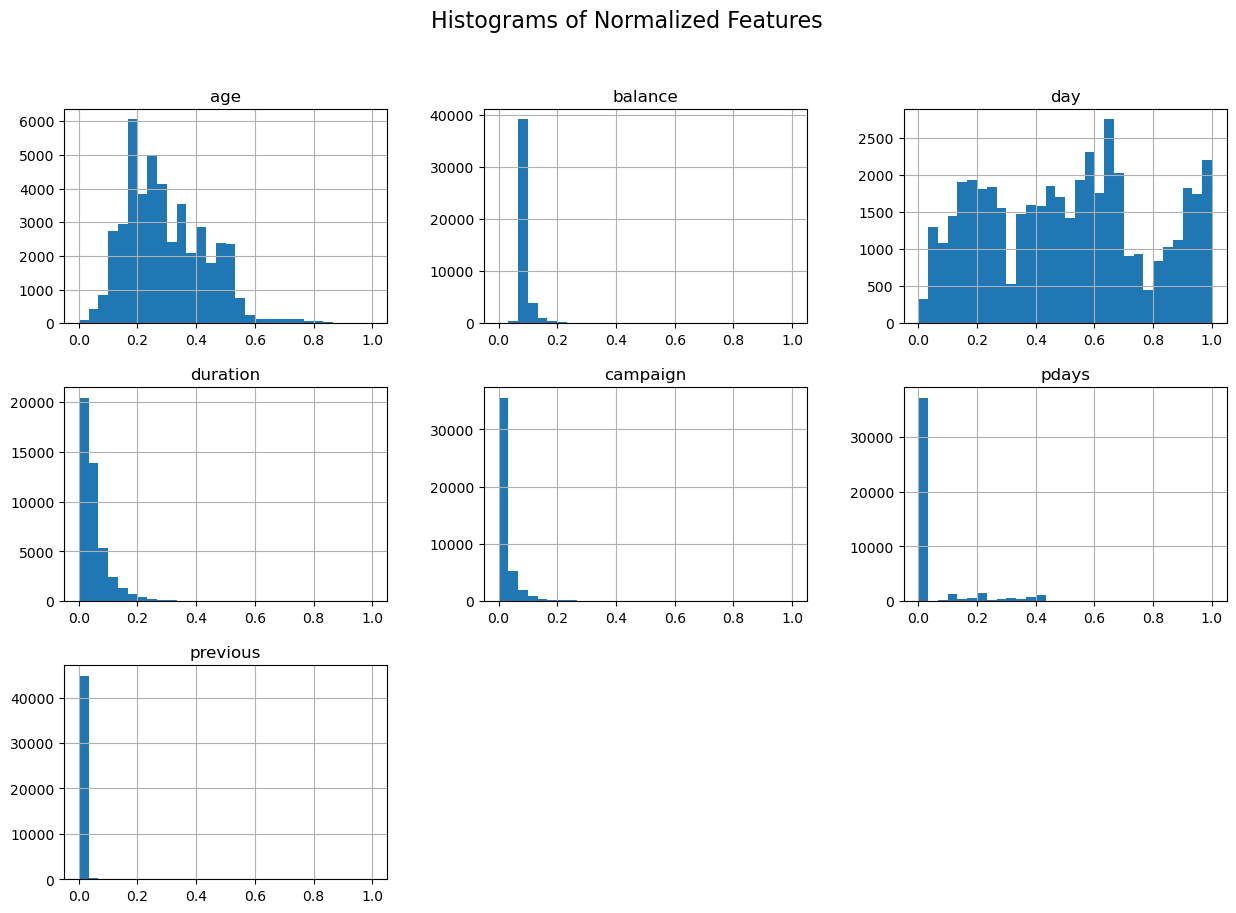

In [36]:
# code here
# Assuming df_norm is the normalized DataFrame
df_norm.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Normalized Features', fontsize=16)
plt.show()

## KMeans


Let's warm up with the well known algorithm named KMeans!

Centroid-based clustering organizes the data into non-hierarchical clusters, contrarily to hierarchical clustering. KMeans is the most widely-used centroid-based clustering algorithm. Centroid-based algorithms are efficient but sensitive to initial conditions and outliers. 


To better understand the way the algorithm works, read the documents and watch the video in Resources C:
* https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
* https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)


Then answer the below questions (in your own words):
1. What is a centroid?
2. How can you compute a centroid?
3. Are you supposed to know in advance the number of clusters in order to use the KMeans algorithm?


*Answer here*

#### Make the necessary imports from scikit learn in order to perform KMeans clustering

In [37]:
# code here
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#### Exploring KMeans with sklearn

The goal of this step is to become familiar with the sklearn clustering package and the silhouette analysis concepts.

Start by performing a clustering of the data in *df_norm* into 5 clusters.

In [39]:
# code here
# Initialize KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model to the data
kmeans.fit(df_norm)

# Predict the cluster for each data point
cluster_labels = kmeans.predict(df_norm)
# Calculate the silhouette score
silhouette_avg = silhouette_score(df_norm, cluster_labels)

print(f"Silhouette Score for 5 clusters: {silhouette_avg:.2f}")

/home/abdelmoutalib.nioua@Digital-Grenoble.local/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 5 clusters: 0.34


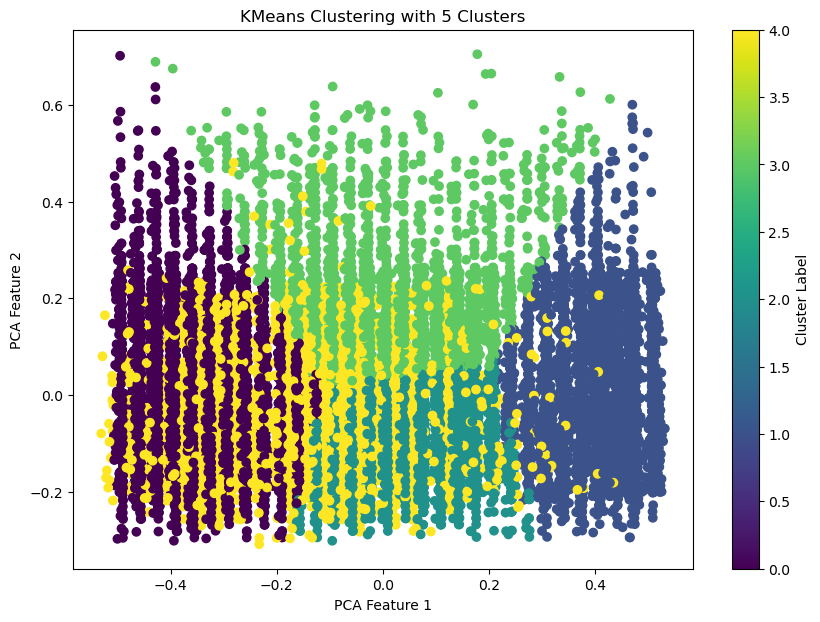

In [41]:
from sklearn.decomposition import PCA

# Reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_norm)

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('KMeans Clustering with 5 Clusters')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

Print the centroids obtained

In [42]:
# code here
# Assuming kmeans is the KMeans object that has been fitted to the data
centroids = kmeans.cluster_centers_

# Print the centroids
print("Centroids of the 5 clusters:")
print(centroids)

Centroids of the 5 clusters:
[[0.29115778 0.08416845 0.17237785 0.05325662 0.02113126 0.01925762
  0.00147837]
 [0.29259684 0.08324906 0.89317867 0.04877722 0.04368244 0.02408489
  0.00134975]
 [0.21227076 0.08545452 0.56240658 0.05489198 0.02738967 0.01637798
  0.00112933]
 [0.46478484 0.08997006 0.52238476 0.05227486 0.02827769 0.02129443
  0.00146578]
 [0.26596087 0.08313256 0.37157935 0.05213235 0.01952755 0.37560674
  0.01122835]]


In [43]:
centroids_df = pd.DataFrame(centroids, columns=df_norm.columns)
print(centroids_df)

        age   balance       day  duration  campaign     pdays  previous
0  0.291158  0.084168  0.172378  0.053257  0.021131  0.019258  0.001478
1  0.292597  0.083249  0.893179  0.048777  0.043682  0.024085  0.001350
2  0.212271  0.085455  0.562407  0.054892  0.027390  0.016378  0.001129
3  0.464785  0.089970  0.522385  0.052275  0.028278  0.021294  0.001466
4  0.265961  0.083133  0.371579  0.052132  0.019528  0.375607  0.011228


Print the cluster labels assigned to each point

In [44]:
# code here
# Assuming kmeans is the KMeans object that has been fitted to the data
cluster_labels = kmeans.labels_

# Print the cluster labels assigned to each data point
print("Cluster Labels for each data point:")
print(cluster_labels)

Cluster Labels for each data point:
[0 0 0 ... 3 3 2]


In [45]:
# Add the cluster labels to the DataFrame
df_norm_with_labels = df_norm.copy()
df_norm_with_labels['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
print(df_norm_with_labels.head())

        age   balance       day  duration  campaign  pdays  previous  Cluster
0  0.519481  0.092259  0.133333  0.053070       0.0    0.0       0.0        0
1  0.337662  0.073067  0.133333  0.030704       0.0    0.0       0.0        0
2  0.194805  0.072822  0.133333  0.015453       0.0    0.0       0.0        0
3  0.376623  0.086476  0.133333  0.018707       0.0    0.0       0.0        0
4  0.194805  0.072812  0.133333  0.040260       0.0    0.0       0.0        0


### **Visualization**

Let's try to visualize the created clusters. As it is easier to visualize 2-dimensional data, first run PCA on the data. Then create a scatterplot to visualize the clustered points, each coloured differently depending on the cluster they belong to.

In [46]:
# code here
# Initialize PCA to reduce the data to 2 components
pca = PCA(n_components=2)

# Fit and transform the normalized data
df_pca = pca.fit_transform(df_norm)

# df_pca is now a 2D representation of the original data

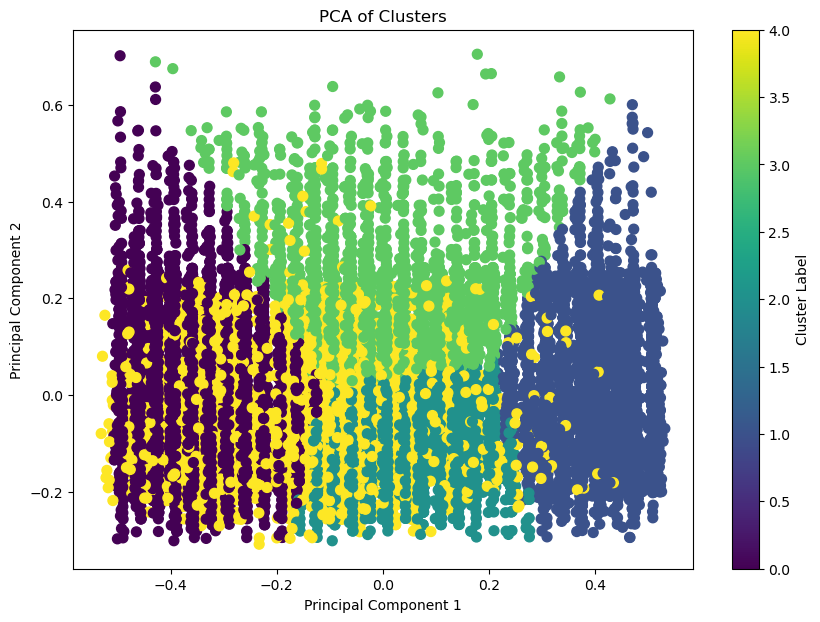

In [47]:
# Plotting the clustered data points in 2D
plt.figure(figsize=(10, 7))

# Scatter plot of the two PCA components, colored by cluster label
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)

# Annotate the plot
plt.title('PCA of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

### Evaluation

**Inertia** can be a measure of how internally coherent clusters are. It represents the within-cluster sum-of-squares.

Read more about it here:
https://scikit-learn.org/stable/modules/clustering.html#k-means 

Print the inertia obtained after the clustering.

In [48]:
# code here
# Assuming kmeans is the KMeans object that has been fitted to the data
inertia = kmeans.inertia_

# Print the inertia
print(f"Inertia after clustering: {inertia:.2f}")

Inertia after clustering: 1500.87


**The silhouette score**

Make the necessary imports from scikit learn and compute the silhouette score.

Read what this score represents and how it is computed here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html and here https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

In [49]:
# code here
# Compute the silhouette score
sil_score = silhouette_score(df_norm, cluster_labels)

# Print the silhouette score
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.34


You can read more about other clustering evaluation methods here: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

### Finding the optimal number of clusters

In the following article you will find several [methods](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) for determining the number of clusters.

We will first use the silhouette score for obtaining the optimal number of clusters. Optional: another method you can try is the [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) ).


**Use the silhouette analysis to find an optimal number of clusters for the bank clients data.** 

An example of silhouette analysis is presented here: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

Plot the silhouette scores for 20 different numbers of clusters of your choice.

/home/abdelmoutalib.nioua@Digital-Grenoble.local/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 2, Silhouette Score: 0.40


/home/abdelmoutalib.nioua@Digital-Grenoble.local/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 3, Silhouette Score: 0.32


/home/abdelmoutalib.nioua@Digital-Grenoble.local/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 4, Silhouette Score: 0.35


/home/abdelmoutalib.nioua@Digital-Grenoble.local/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 5, Silhouette Score: 0.34


/home/abdelmoutalib.nioua@Digital-Grenoble.local/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 6, Silhouette Score: 0.31


/home/abdelmoutalib.nioua@Digital-Grenoble.local/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 7, Silhouette Score: 0.30


/home/abdelmoutalib.nioua@Digital-Grenoble.local/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 8, Silhouette Score: 0.30


/home/abdelmoutalib.nioua@Digital-Grenoble.local/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 9, Silhouette Score: 0.30


/home/abdelmoutalib.nioua@Digital-Grenoble.local/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 10, Silhouette Score: 0.29


/home/abdelmoutalib.nioua@Digital-Grenoble.local/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 11, Silhouette Score: 0.30


/home/abdelmoutalib.nioua@Digital-Grenoble.local/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 12, Silhouette Score: 0.28


/home/abdelmoutalib.nioua@Digital-Grenoble.local/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 13, Silhouette Score: 0.28


/home/abdelmoutalib.nioua@Digital-Grenoble.local/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 14, Silhouette Score: 0.27


/home/abdelmoutalib.nioua@Digital-Grenoble.local/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 15, Silhouette Score: 0.26


/home/abdelmoutalib.nioua@Digital-Grenoble.local/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 16, Silhouette Score: 0.26


/home/abdelmoutalib.nioua@Digital-Grenoble.local/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 17, Silhouette Score: 0.27


/home/abdelmoutalib.nioua@Digital-Grenoble.local/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 18, Silhouette Score: 0.25


/home/abdelmoutalib.nioua@Digital-Grenoble.local/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 19, Silhouette Score: 0.24


/home/abdelmoutalib.nioua@Digital-Grenoble.local/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 20, Silhouette Score: 0.24


/home/abdelmoutalib.nioua@Digital-Grenoble.local/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 21, Silhouette Score: 0.24


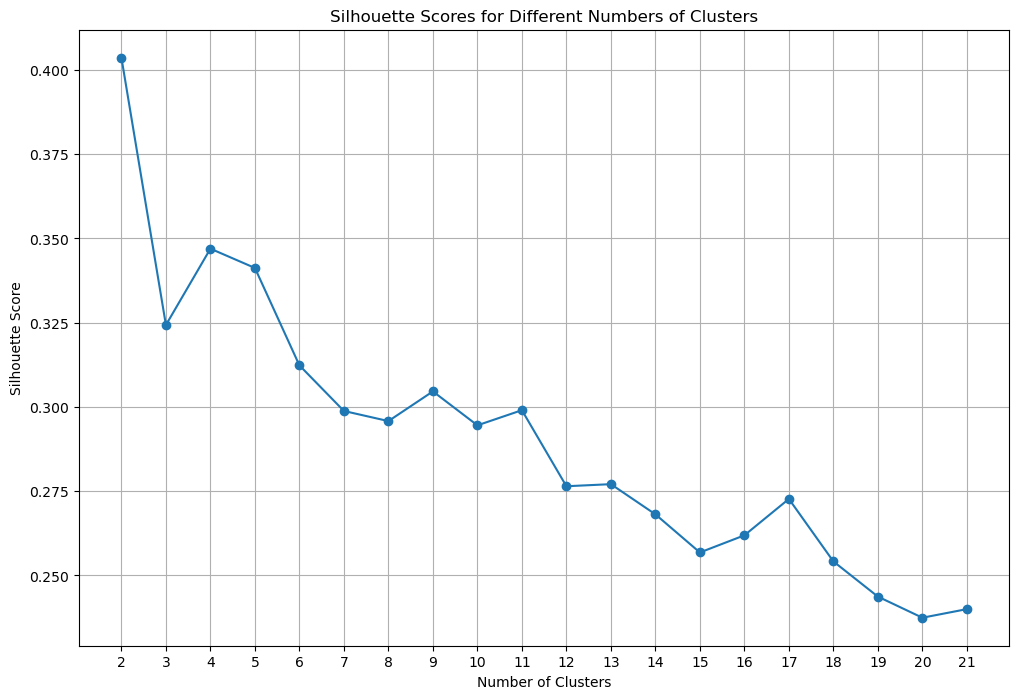

In [50]:
# code here
# Define the range of cluster numbers to test
cluster_range = range(2, 22)  # Testing from 2 to 21 clusters

# Store silhouette scores for each number of clusters
silhouette_scores = []

for n_clusters in cluster_range:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit the model and predict cluster labels
    cluster_labels = kmeans.fit_predict(df_norm)
    
    # Compute the silhouette score
    sil_score = silhouette_score(df_norm, cluster_labels)
    
    # Append the silhouette score to the list
    silhouette_scores.append(sil_score)
    
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {sil_score:.2f}")

# Plot the silhouette scores
plt.figure(figsize=(12, 8))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)  # Ensure all cluster numbers are shown on x-axis
plt.grid(True)
plt.show()

What is the optimal number of clusters that you obtained?

*Answer here*

## Hierarchical Clustering

Let's try to apply now a different method on the same data. You can find more explanations on hierarchical clustering in the links in section Resources D. Hierarchical clustering:
 * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
 * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
 * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

Make the necessary imports from scikit learn to perform hierarchical clustering. 

Start by plotting the dendrogram and deciding the number of clusters. Then apply hierarchical clustering.

You might find this useful: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html for creating the dendrogram.

In [ ]:
# code here

How many clusters did you find?

*Answer here*

Compare the kmeans labels with the labels obtained by the hierarchical clustering.

In [ ]:
# code here

### Application: clustering images

Theses techniques can be use to reduce the number of colours in a picture

- find a picture you want to reduce the number of colours.
- use `skimages` and `sklearn` to reduce the number of colours in this picture
- from your picture create two pictures with 16 colours what do you notice?

In [ ]:
# install skimage

#Code here

Now let's try to apply KMeans clustering on the simple digits data that can be loaded from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

The goal is to use KMeans to try to identify similar digits without using the original label information.

Start by loading the digits and then finding the KMeans clusters. The digits data consists of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image.

In [ ]:
# code here

The cluster centroids themselves are 64-dimensional points, and can thus be interpreted as the "typical" digit within the cluster. Plot each cluster center. Hint: use *imshow*

In [ ]:
# code here

For each of the data points we also have access to their real labels (using *digits.target*). This means we can verify if the clustering algorithm split the data in such a way as to predict the original classes. 

Note that the labels of the discovered clusters may not directly match the initial labels in the dataset (they could be permuted). Write code to match each learned cluster label with the true labels of the data found in them.

In [ ]:
# code here

Now compute the accuracy score between the true labels from the data and the predicted ones.

In [ ]:
# code here

Plot the confusion matrix between the predicted labels and the actual labels. Which were the digits that were most often confused with other digits?

In [ ]:
# code here

What if instead of keeping the original 64 features, we perform a projection into 2 dimensions?
Use the t-distributed stochastic neighbor embedding (t-SNE) algorithm to pre-process the data before performing KMeans. t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters.

Compute the new accuracy.

In [ ]:
# code here